In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="Gemma2-9b-It")

In [8]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with genering title of approx 25 character.")

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with writing blogs with 500 words with not more than 3 paragaph.")


def title_generate(state:MessagesState):
    return {"messages":[llm.invoke([sys_msg] + state["messages"])]}

def content_generate(state:MessagesState):
    return {"messages":[llm.invoke([sys_msg] + state["messages"])]}

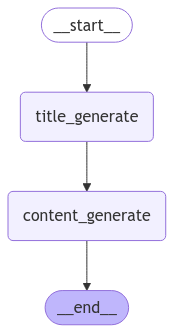

In [9]:

from langgraph.graph import START, StateGraph, END
from IPython.display import Image, display

builder=StateGraph(MessagesState)

## Define the node
builder.add_node("title_generate",title_generate)
builder.add_node("content_generate",content_generate)

## Define the edges
builder.add_edge(START,"title_generate")
builder.add_edge("title_generate","content_generate")

## Add the final node
builder.add_edge("content_generate", END)

react_graph=builder.compile()

# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [10]:
messages = [HumanMessage(content="Generate a blog on how AI is dangerous for humanity.")]
messages = react_graph.invoke({"messages": messages})

In [11]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Generate a blog on how AI is dangerous for humanity.
================================== Ai Message ==================================

## The Looming Shadow of Artificial Intelligence: Is Progress Paving the Path to Peril?

Artificial intelligence has undoubtedly revolutionized our world, automating tasks, providing insights, and pushing the boundaries of what's possible.  From self-driving cars to personalized medicine, AI promises a future brimming with convenience and advancement. However, beneath this gleaming surface lurks a chilling possibility: the potential for AI to become a danger to humanity. This isn't science fiction; it's a real and pressing concern that demands our attention.  

One of the most significant dangers lies in the potential for AI to surpass human intelligence. While the idea of superintelligent machines might seem like a distant fantasy, experts warn that this could become a re